In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
import itertools

[[-1, -50], [70, -27], [81, 9], [44, 42], [-45, 42], [-82, 9], [-71, -27], [-1, -100], [88, -85], [140, -54], [163, -19], [163, 18], [140, 53], [88, 84], [-1, 100], [-89, 84], [-141, 53], [-164, 18], [-164, -19], [-141, -54], [-89, -85], [-1, -150], [94, -139], [164, -113], [211, -81], [238, -46], [249, -10], [245, 27], [226, 63], [190, 97], [133, 126], [49, 147], [-50, 147], [-134, 126], [-191, 97], [-227, 63], [-246, 27], [-250, -10], [-239, -46], [-212, -81], [-165, -113], [-95, -139], [-1, -200], [97, -192], [177, -170], [237, -141], [281, -108], [310, -73], [327, -37], [333, 0], [327, 36], [310, 72], [281, 107], [237, 140], [177, 169], [97, 191], [-1, 200], [-98, 191], [-178, 169], [-238, 140], [-282, 107], [-311, 72], [-328, 36], [-333, -1], [-328, -37], [-311, -73], [-282, -108], [-238, -141], [-178, -170], [-98, -192], [-1, -250], [98, -243], [184, -225], [254, -198], [309, -168], [351, -135], [381, -100], [402, -64], [413, -28], [415, 9], [409, 45], [393, 81], [367, 116], [331

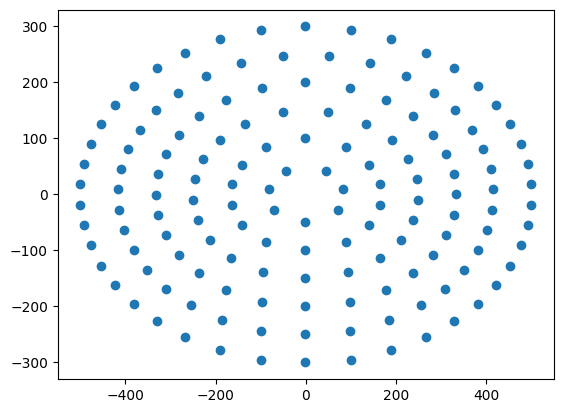

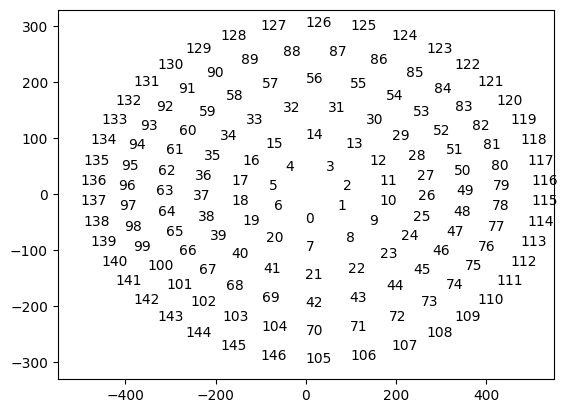

In [5]:
x_range, y_range, layers, divide_number = 1000, 600, 6, 7

def get_points(x_range, y_range, layers, divide_number):
    ar, br, Lyr, dvn = x_range, y_range, layers, divide_number
    ar_list, br_list, Lyr_list, dvn_list =\
      np.floor([((n+1)*ar/2)/Lyr for n in range(Lyr-1)] + [ar/2]),\
      np.floor([((n+1)*br/2)/Lyr for n in range(Lyr-1)] + [br/2]),\
      np.floor(range(1, Lyr+1)), np.floor([dvn*(n+1) for n in range(Lyr)])

    ar_list, br_list, Lyr_list, dvn_list =\
      map(int, ar_list), map(int, br_list), map(int, Lyr_list), map(int, dvn_list)

    def get_points_pxy(ar, br, Lyr, dvn):
        def getArcLengthDiff(rad1, rad2):
            y = lambda x: np.sqrt((ar * np.cos(x))**2 + (br * np.sin(x))**2)
            integ = integrate.quad(y, rad1, rad2)
            return integ[0]

        L = getArcLengthDiff(0, 2* np.pi)
        rad_list, rad_prev, rad_end = [3*np.pi/2], 3*np.pi/2, 7*np.pi/2
        d, r1, r2 = L / dvn, np.pi/2, rad_end

        for i in range(dvn-1):
            while(True):
                if r2 - r1 < math.pow(10, -10):
                    rad_list.append(r2)
                    rad_prev = r2
                    r1 = r2
                    r2 = rad_end
                    break

                midium = r2 + (r1 - r2)/2
                arc = getArcLengthDiff(rad_prev, midium)
                if arc < d:
                    r1 = midium
                else:
                    r2 = midium
        pxy = []
        for radiam in rad_list:
          pxy.append((ar*math.cos(radiam), br*math.sin(radiam)))
        return pxy

    xyresult = []
    for a, b, c, d in zip(ar_list, br_list, Lyr_list, dvn_list):
      xyresult.append(get_points_pxy(ar=a, br=b, Lyr=c, dvn=d))
    #print(xyresult)

    xy_chain = list(itertools.chain.from_iterable(xyresult))
    xy_chain = list(itertools.chain.from_iterable(xy_chain))
    #print(xyresult_chain)

    x_chain = list(map(lambda x: math.floor(x), xy_chain[0::2]))
    y_chain = list(map(lambda x: math.floor(x), xy_chain[1::2]))

    xy_chain = [x_chain, y_chain]

    points = []
    points_temp = []

    for a, b in zip(x_chain, y_chain):
       points_temp.append([a, b])

    print(points_temp)

    points = np.array(points_temp)

    plt.scatter(points[:,0], points[:,1])
    plt.show()

    plt.plot(points[:,0], points[:,1], 'ro', alpha = 0.0)
    for i in range(points.shape[0]):
      plt.text(points[i,0], points[i,1], str(i))
    plt.show()


    return points

points=get_points(x_range, y_range, layers, divide_number)

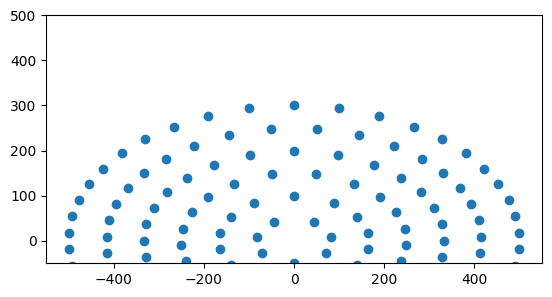

In [7]:
plot = plt.subplot()
plot.set_aspect('equal')
plot.set_xlim([-550, 550])
plot.set_ylim([-50, 500])
plt.scatter(points[:,0], points[:,1])
plt.show()